In [41]:
%matplotlib inline
%load_ext autoreload
from nilearn import image, plotting
from matplotlib import pyplot as plt
import numpy as np 
from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
%autoreload 1

In [43]:
%aimport preprocess.normalization
%aimport preprocess.reader

In [44]:
img = image.load_img('example.nii')

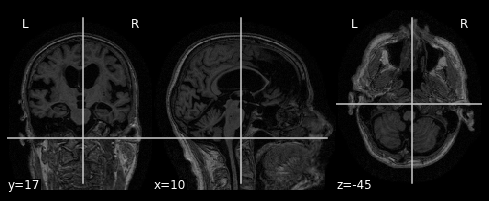

In [45]:
plotting.plot_anat(img)

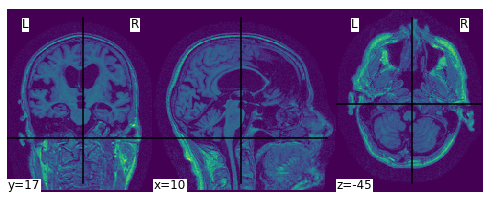

In [46]:
plotting.plot_img(img)

In [7]:
raw_data = img.get_data()

### Draw by layers

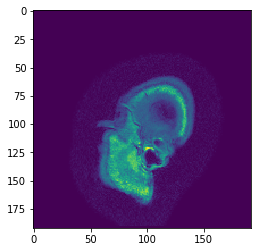

In [8]:
plt.imshow(raw_data[:,:,21])

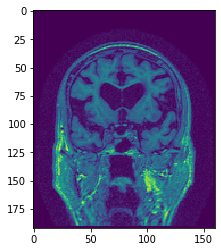

In [9]:
plt.imshow(raw_data[:,80,:])

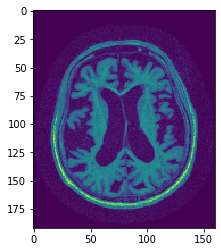

In [10]:
plt.imshow(raw_data[80,:,:])

In [11]:
from os import walk

In [12]:
imgs = {}
for  (dirpath, dirnames, filenames) in walk("data"): 
    for i in filenames: 
        if i.endswith("nii"):
            name = dirpath + "/" + i
            group = dirpath.split("/")[1].split("_")[-1][-1]
            session = dirpath.split("/")[-2]
            date = dirpath.split("/")[-1]
            imgs[name] = {
                "img" : image.smooth_img(name, None), 
                "group" : group,
                "session" : session,
                "date" : date,
                "data" : image.smooth_img(name, None).get_data()
            }

IndexError: list index out of range

In [ ]:
data = [ v["data"] for _, v in imgs.items()]
data = list(filter(lambda x: x.shape == (256, 256, 128, 1), data))

In [ ]:
imgs['OASIS2/OAS2_0001_MR2/1/123127131/mpr-1.nifti.img']["data"].shape

In [ ]:
import seaborn as sns


In [ ]:
sns.distplot(voxel_dist[80][80][80][0], bins=40)
#stats.entropy(voxel_dist[80][60][60][0])

In [ ]:
stats.entropy(voxel_dist[30][0][0][0])

In [ ]:
np.min(voxel_dist[0][0][0][0])

In [ ]:
voxel_dist.shape

In [ ]:
voxel_dist.shape

In [ ]:
voxel_entropy = np.apply_over_axes(, voxel_dist,[-1] )

In [ ]:
stats.entropy([0, 0])

In [ ]:
import os
from nilearn import image, plotting
from matplotlib import pyplot as plt
import numpy as np 
from scipy import stats
import logging

In [66]:
data = preprocess.reader.read_nii_arrays("data")
norm_data = preprocess.normalization.normalize(data)

In [ ]:
np.max(data*100)

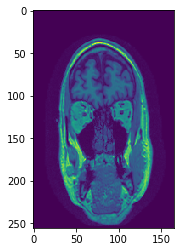

In [49]:
plt.imshow(data[0][:,80,:])

In [63]:
import numpy as np
from scipy import stats

def voxel_dist_operations(data, operations=[np.max, np.mean, np.var, np.min, np.median]):
    voxel_dist = np.stack(data, axis=-1)
    # apply each operation on each voxel distribution and create result matrices
    return {op.__name__:np.squeeze(np.apply_over_axes(op, voxel_dist,[-1])) for op in operations}

In [70]:
norm_test =  lambda x, y: stats.normaltest(x,y).pvalue
operators = [np.max, np.mean, np.var, np.min, np.median, norm_test]
res = voxel_dist_operations(norm_data, operators)

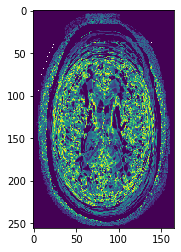

In [76]:
plt.imshow(res['<lambda>'][90,:,:])

In [79]:
voxel_dist = np.stack(data, axis=-1)
np.apply_over_axes(np.histogram, voxel_dist,[-1])

AttributeError: 'tuple' object has no attribute 'ndim'

In [86]:
x = [0.1, 0.2, 0.4, 0.8]

In [89]:
np.histogram(x, range=(0,1), bins=4, density=True)

(array([2., 1., 0., 1.]), array([0.  , 0.25, 0.5 , 0.75, 1.  ]))

In [29]:
def hist_entropy():
    hist 

In [30]:
nilearn.image.clean_img(data, standardize=True)

TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
0.0

In [14]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=None, standardize=True)
normalized_imgs = masker.fit_transform(data)

NameError: name 'data' is not defined

In [33]:
import nibabel

In [34]:
nibabel

<module 'nibabel' from '/mnt/d/Workspace/master_thesis/neuron/lib/python3.6/site-packages/nibabel/__init__.py'>

In [35]:
import nibabel as nib

In [36]:
img = nib.load("data/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii")

array(nan, dtype=float32)

In [51]:
?nib.load

Signature: nib.load(filename, **kwargs)
Docstring:
Load file given filename, guessing at file type

Parameters
----------
filename : string
   specification of file to load
\*\*kwargs : keyword arguments
    Keyword arguments to format-specific load

Returns
-------
img : ``SpatialImage``
   Image of guessed type
File:      /mnt/d/Workspace/master_thesis/neuron/lib/python3.6/site-packages/nibabel/loadsave.py
Type:      function


In [13]:
from sklearn import preprocessing
preprocessing.scale(data)

NameError: name 'data' is not defined

In [32]:
data = preprocess.reader.read_nii_arrays("data")

In [33]:
norm_data = preprocess.normalization.normalize(data)

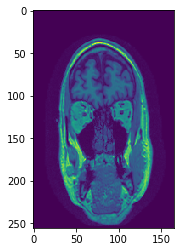

In [37]:
plt.imshow(norm_data[0][:, 80,:])

In [31]:
norm_data